#  PHASE 3 PROJECT


Student name: Joan Nyamache

Student pace: Remote

Scheduled project review date/time:

Instructor name: Asha Deen


# Project Overview

SyriaTel, a prominent telecommunications company, is confronting the issue of customer churn. To mitigate financial losses and ensure the company's longevity, this project seeks to create a classification model that predicts customer churn by identifying the patterns and factors associated with it. By leveraging these insights, the company can implement proactive strategies to retain customers and promote sustained growth.

# Problem Statement

SyriaTel Telecommunications is committed to connecting people through seamless communication. In their continuous quest for excellence, they have faced the challenge of customer churn. Each lost customer not only represents a severed connection but also threatens the company's financial growth and future. By analyzing the factors and patterns associated with churn and developing an effective classification model to predict it, SyriaTel can implement targeted actions to prevent churn and ensure business continuity.

This analysis explores the patterns and predictors of customer churn at SyriaTel, a leading telecommunications provider. By examining customer usage data, service plans, and interaction history, we employ statistical analysis and machine learning models to identify the primary drivers of churn. The study aims to segment the customer base, assess the impact of various service features on customer retention, and develop a predictive model to identify at-risk customers. The insights gained from this analysis will guide targeted interventions to enhance customer satisfaction and loyalty, reduce churn rates, and promote long-term business growth.

Import Data and necessary Libraries

In [32]:
#Importing the relevant libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Loading the data

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

Exploring the data to get;

Shape of the data

Categorical variables

Outliers or errors

The data types

Missing values

The duplicates


In [34]:
# Shape of the data
df.shape

(3333, 21)

In [35]:
# An overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [36]:
# Number of columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [37]:
#Checking for missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [38]:
# Checking for duplicates
df.duplicated().sum()

0

In [39]:
# A statistical summary of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [40]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

# Data findings

The dataset consists of four main data types; float, integer, bool and object.

There are no missing values.

There are no duplicated rows in this dataset.

The dataset contains 21 columns and 3333 rows. This means there are 21 different variables each with 3333 records.

# Checking for validity

Verify that every column in the dataset is accurate and appropriate for this analysis, and remove any that are not.

I'll drop Phone Number variable because it doesn't seem to have any effect on the dataset.

In [41]:
#Dropping the phone number variable
data = df.drop(['phone number'], axis = 1)

The churn variable is in boolean type, I will convert it to an integer so that 0 represents False and 1 represents True.

In [42]:
#Converting the churn boolean variable to an integer
data['churn'] = data['churn'].astype(int)
data['churn'].dtype

dtype('int32')

# Collinearity

Checking for collinearity in the dataset.

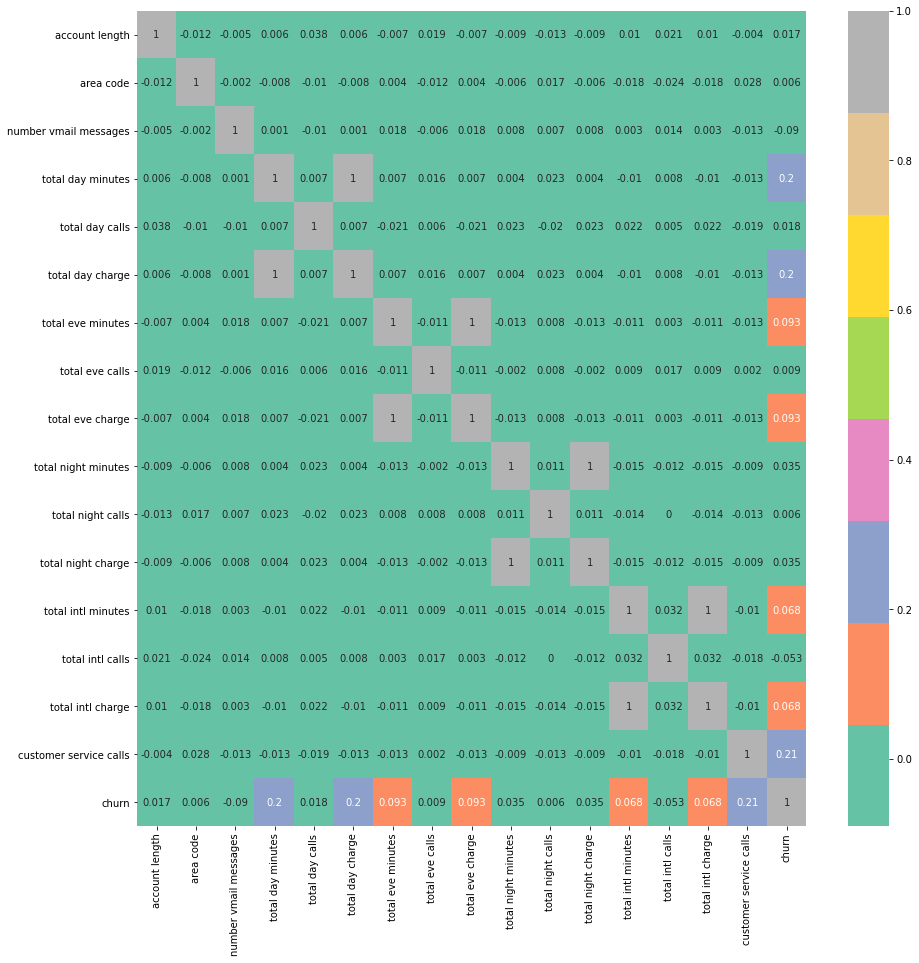

In [43]:
# collinearity check
corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr.round(3),annot = True,cmap = 'Set2')
plt.show()

The dataset contains highly correlated with a correlation of 1 as per the above graph:

a. Total day minutes and Total day charge

b. Total Eve minutes and Total eve charge

c. Total Night minutes and Total Night charge

d. Total Intl minutes and Total Intl charge

I will go ahead and drop all the variables with minutes so as to reduce multicollinearity

In [44]:
#Creating a function for the Variance Inflation Factor
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [45]:
#Calculating VIF having dropped the minutes variables so as to reduce high multicollinearity.
calculate_vif(df=data, features=['account length', 'area code', 'number vmail messages',
                                 'total day calls', 'total day charge',
                                 'total eve calls', 'total eve charge',
                                 'total night calls', 'total night charge', 
                                 'total intl calls', 'total intl charge',
                                 'customer service calls'])

,VIF,Tolerance
account length,1.002775,0.997233
area code,1.002344,0.997662
number vmail messages,1.000930,0.999071
total day calls,1.003877,0.996138
total day charge,1.001319,0.998683
total eve calls,1.001359,0.998643
total eve charge,1.001481,0.998521
total night calls,1.001967,0.998037
total night charge,1.001495,0.998508
total intl calls,1.002972,0.997037


The data has a reasonable Variance Inflation Factor as it is now below 5

#  Exploratory Data Analysis

Lets look at our data and answer a few questions ;

1. Which time of the day does SyriaTel make most income?
2. Which State provides the highest income to SyriaTel?
3. Does SyriaTel make more from those with international plan or those without the plan?


In [46]:
data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [47]:
#Creating a new variable called income that contains the charges charged by SyriaTel
data['income' ]= data['total day charge'] +data['total eve charge'] + data['total night charge'] + data['total intl charge']

In [48]:
#confirming the new column as been added
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,income
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


Which time of the day does SyriaTel make most income?

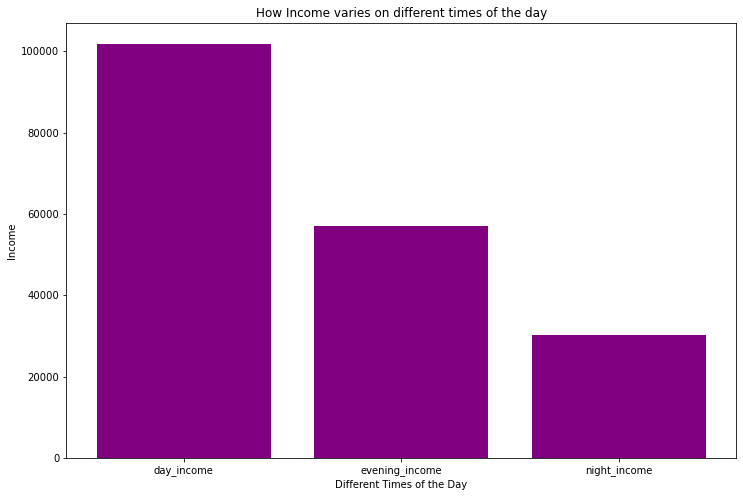

In [50]:
#Creating variables for the total income on the 3 different times of the day
day_income = data['total day charge'].sum()
evening_income = data['total eve charge'].sum()
night_income = data['total night charge'].sum()

#plotting
fig, ax = plt.subplots(figsize=(12, 8))

income_diff_times_of_day = [day_income, evening_income, night_income]
label2 = ['day_income', 'evening_income', 'night_income']

ax.bar(label2, income_diff_times_of_day, color='purple')

ax.set_xlabel("Different Times of the Day")
ax.set_ylabel("Income")
ax.set_title("How Income varies on different times of the day");

 SyriaTel makes more revenue during the day

Which State provides the highest income to SyriaTel?

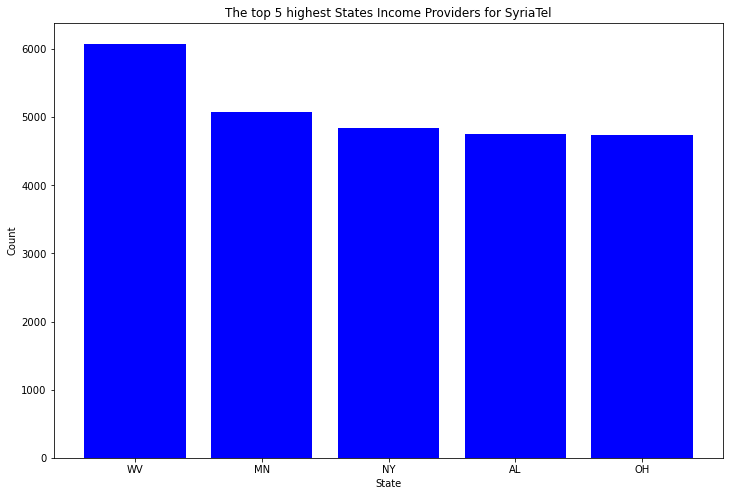

In [54]:
# All the states in the dataset
state_income = data[['state', 'income']]

# Groupby state and selecting the top 5
state_income= state_income.groupby(['state']).sum().reset_index().nlargest(5, 'income')

# plotting
fig, ax = plt.subplots(figsize=(12, 8))

income = state_income['income']
label = state_income['state']

ax.bar(label, income, color='blue')

ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("The top 5 highest States Income Providers for SyriaTel");

West Virginia provides the highest income to SyriaTel

Does SyriaTel make more from those with international plan or those without the plan?

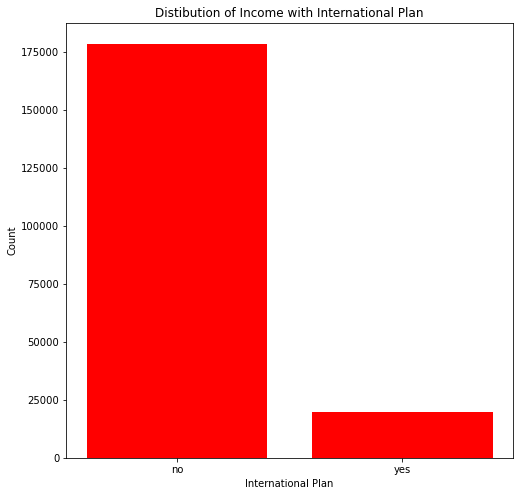

In [56]:
# All the states in the dataset
intl_income = data[['international plan', 'income']]

# Groupby international plan
intl_income= intl_income.groupby(['international plan']).sum().reset_index().nlargest(5, 'income')

# plotting
fig, ax = plt.subplots(figsize=(8, 8))

intl = intl_income['income']
label1 = intl_income['international plan']

ax.bar(label1, intl, color='red')

ax.set_xlabel("International Plan")
ax.set_ylabel("Count")
ax.set_title("Distibution of Income with International Plan");

Syria get's a higher income from those without an international plan

# Modelling

To begin modelling we performed the following steps;

 * Assigned the 'churn' column to y

* Dropped the 'churn', 'phone number' and 'state' columns from df, and assign the resulting DataFrame to X
    
* Performed one-hot encoding on the categorical features.
    
* Split X and y into training and test sets, assigned 30% to the test set and set the random_state to 42

Converting the Categorical variables i.e International Plan and Voice Mail Plan to dummies

In [57]:
encoded_data = pd.get_dummies(data, columns = ['international plan', 'voice mail plan'],drop_first=True, dtype = int)
print(encoded_data.dtypes)

state                      object
account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
income                    float64
international plan_yes      int32
voice mail plan_yes         int32
dtype: object


In [58]:
#Converting the state variable to a dummy
states_dummies = pd.get_dummies(encoded_data["state"], prefix="STATES")
encoded_data = pd.concat([encoded_data, states_dummies], axis = 1)
encoded_data.head()

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,STATES_SD,STATES_TN,STATES_TX,STATES_UT,STATES_VA,STATES_VT,STATES_WA,STATES_WI,STATES_WV,STATES_WY
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#Drpping the state variable
encoded_data.drop('state', axis =1, inplace=True)

Splitting X and Y values

In [61]:
#Splitting the dataset y to have the jtarget variable and X to have the predictors
y = encoded_data['churn']
X = encoded_data.drop(['churn'], axis = 1)

Train Test Split of the data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 70), (1000, 70), (2333,), (1000,))

# Scaling

We are scaling the data using the Standard Scaler method. Standardize the data by making the mean of the distribution zero and the majority of the data will be between -1 and 1.

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [65]:
# We are going to scale the original X and Y data in order to use the cross validation score

X_scaler = StandardScaler()
    
X_scaler.fit(X)
    
X_scaled = pd.DataFrame(X_scaler.transform(X), columns=X.columns)

# Building models

We create a function that would later look through the model classifiers and calculate the various scores to evaluate each model.

We chose to run the following classifiers for our data:

Logistic Regression, K-Nearest Neighbor and Decision Tree

In [66]:
def Train_Test_Scores(model):
    
    model.fit(X_train_scaled,y_train)

    print('Test_Accuracy:',  model.score(X_train_scaled,y_train))
    print('Test_Accuracy:', model.score(X_test_scaled,y_test))
    print('Recall:', precision_score(y_test,y_preds))
    print('Precision:', f1_score(y_test,y_preds))
    plot_confusion_matrix(model, X_test_scaled, y_test, cmap="Blues")

# KNN MODEL

We will use SMOTE due to the heavily imbalanced our dataset is

In [68]:
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_scaled_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train) 

# Preview synthetic sample class distribution
print('\n')

print(pd.Series(y_train_resampled).value_counts()) 

0    1993
1     340
Name: churn, dtype: int64


1    1993
0    1993
Name: churn, dtype: int64


Train_Accuracy: 0.9054189663823382
Test_Accuracy: 0.714
Recall: 0.5594405594405595
Precision: 0.264026402640264
F1_Score: 0.35874439461883406
mean_CV_recall: 0.064196735395189


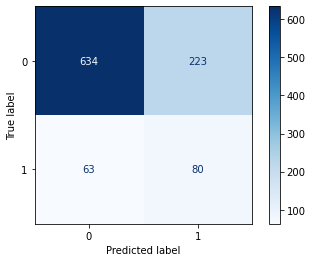

In [69]:
knn = KNeighborsClassifier() 

knn.fit(X_train_scaled_resampled, y_train_resampled)
    
print('Train_Accuracy:', knn.score(X_train_scaled_resampled,y_train_resampled))
print('Test_Accuracy:', knn.score(X_test_scaled,y_test))
print('Recall:', recall_score(y_test,knn.predict(X_test_scaled)))
print('Precision:', precision_score(y_test,knn.predict(X_test_scaled)))
print('F1_Score:',f1_score(y_test,knn.predict(X_test_scaled)))
print('mean_CV_recall:', np.mean(cross_val_score(knn, X_scaled, y, scoring="recall", cv = 5)))

plot_confusion_matrix(knn, X_test_scaled, y_test, cmap="Blues")

Train_Accuracy: 0.8381836427496236
Test_Accuracy: 0.663
Recall: 0.6153846153846154
Precision: 0.23783783783783785
F1_Score: 0.34307992202729043


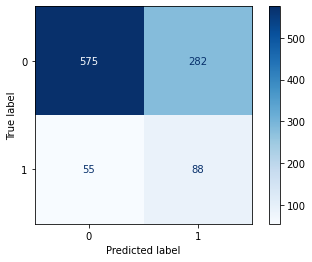

In [70]:
best_knn = KNeighborsClassifier(n_neighbors = 13,
                                metric = 'euclidean',
                                weights = 'uniform') 

best_knn.fit(X_train_scaled_resampled,y_train_resampled)

print('Train_Accuracy:', best_knn.score(X_train_scaled_resampled,y_train_resampled))
print('Test_Accuracy:', best_knn.score(X_test_scaled,y_test))
print('Recall:', recall_score(y_test,best_knn.predict(X_test_scaled)))
print('Precision:',precision_score(y_test,best_knn.predict(X_test_scaled)))
print('F1_Score:',f1_score(y_test,best_knn.predict(X_test_scaled)))
('mean_CV_recall:', np.mean(cross_val_score(best_knn, X_scaled, y, scoring="recall", cv = 5)))

plot_confusion_matrix(best_knn, X_test_scaled, y_test, cmap="Blues")

# Logistic Regression

Test_Accuracy: 0.7741105872267466
Test_Accuracy: 0.763
Recall: 0.143
Precision: 0.2502187226596675


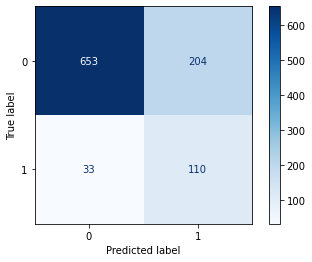

In [71]:
LogReg =(LogisticRegression(solver='lbfgs', class_weight='balanced'))
# fit  the model
LogReg.fit(X_train_scaled, y_train)

#Get the X_test Predict values
y_preds = LogReg.predict(X_test)

Train_Test_Scores(LogReg)

# Decision Tree Model

Test_Accuracy: 1.0
Test_Accuracy: 0.969
Recall: 0.143
Precision: 0.2502187226596675


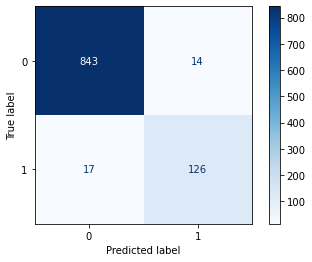

In [72]:
DT_clf = DecisionTreeClassifier()
Train_Test_Scores(DT_clf)

# Tuning and Pruning in Decision Tree

Tuning the model to avoid issues of overfitting

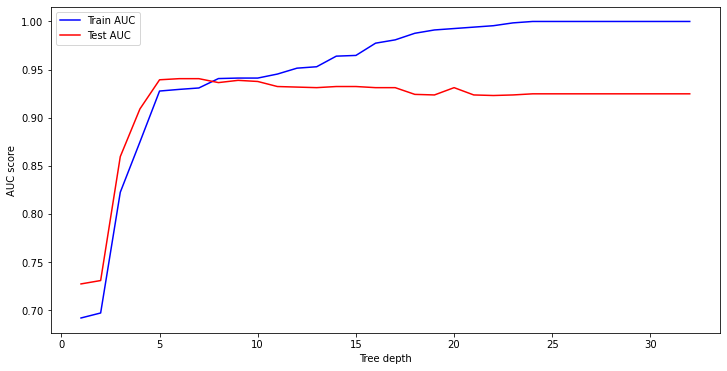

In [73]:
#Maximum Tree Depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   DT = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
   DT.fit(X_train, y_train)
   train_pred = DT.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)


   # Adding AUC score to previous train results
   train_results.append(roc_auc)
   y_pred = DT.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# Conclusion

Modeling Insights

For the predictor and based on the results of the Hyperparameter tuning, we choose The Decision Tree Classifier Model for prediction since it has the highest testing accuracy, in comparison with the other models, it also has the highest area under the curve. 

The conclusions are as follows; 

* Churn Analysis: The analysis revealed that the churn rate for SyriaTel is approximately 14.5%, indicating a significant portion of customers leaving the service.

* Factors such as having an international plan and the number of customer service calls show a moderate positive correlation with churn, suggesting that these factors may influence customer retention.

* Customer Behavior Insights: Customers with an international plan are more likely to churn compared to those without one, indicating a need to investigate the reasons behind this trend.

* The number of customer service calls shows a weak positive correlation with churn, suggesting that higher engagement with customer service may not necessarily lead to improved retention.

* Geographical Patterns: The distribution of churned and non-churned customers across different states reveals potential geographical variations in churn rates, which could be further explored to understand regional customer behavior.

* Service Usage Analysis: Analysis of service usage patterns, such as total day minutes and total evening minutes, did not show significant correlations with churn. However, further exploration may be warranted to understand the impact of these factors on customer retention.



# Recommendation

* Customer Service Experience: The analysis indicates a weak positive correlation between customer service calls and churn. SyriaTel should focus on enhancing its customer service experience by providing prompt and effective support, streamlining issue resolution processes, and ensuring a satisfactory customer interaction. Investing in staff training, optimizing response times, and implementing self-service options can help reduce the number of customer service calls and improve overall customer satisfaction.

* International Plans: The analysis suggests that customers with international plans have a higher churn rate. SyriaTel should assess the value and attractiveness of their international plans and consider offering additional benefits or incentives to retain these customers. Special promotions, discounted rates, or enhanced customer support for international calling can help improve customer satisfaction and reduce churn in this segment.

* Pricing and Usage Plans: The analysis indicates a strong correlation between the total minutes used and the corresponding charges. SyriaTel can consider offering competitive pricing plans that align with customer usage patterns. This can include options for bundled minutes or customized plans based on peak usage times (day, evening, night) to optimize customer satisfaction and reduce churn.

* Service Quality: While not directly analyzed in the provided information, it is crucial for SyriaTel to continually monitor and improve service quality, especially regarding internet services. Addressing issues related to internet reliability, speed, and fiber optic connections can significantly impact customer satisfaction and reduce churn. Regular network maintenance, infrastructure upgrades, and proactive communication with customers regarding service enhancements can help improve customer retention.